## Load Dataset

In [17]:
import pandas as pd
import numpy as np
dfx = pd.read_csv('train_feature.csv')
dfy = pd.read_csv('train_label.csv')
dfx.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_110,feature_111,feature_112,feature_113,feature_114,feature_115,feature_116,feature_117,feature_118,feature_119
0,48.0,9.804220,0.064283,6.0,5.0,211.0,45.0,8.0,3.0,2.711200,...,4.0,1.157242,44.0,0.027881,1.122944,0.0,47.0,1.732584,2.0,52.0
1,45.0,-15.118262,0.590192,10.0,2.0,141.0,48.0,7.0,1.0,3.276093,...,4.0,0.583108,62.0,0.852767,4.685032,1.0,38.0,0.601408,2.0,44.0
2,56.0,1.691250,0.173249,8.0,1.0,251.0,47.0,6.0,1.0,1.082628,...,6.0,0.741096,62.0,0.907026,0.927391,2.0,53.0,2.129846,1.0,46.0
3,50.0,5.867626,0.004743,8.0,3.0,186.0,39.0,8.0,1.0,2.992557,...,5.0,1.173169,60.0,0.165119,7.096296,1.0,56.0,0.474665,2.0,38.0
4,49.0,-6.160454,0.709718,9.0,3.0,240.0,57.0,6.0,1.0,3.189316,...,5.0,1.068687,54.0,0.600518,4.988225,7.0,52.0,1.187483,2.0,NaN


## Data Process

### 对异常值与缺失值采样填充

In [2]:
np.random.seed(0)

# 选择特征
dfx = pd.DataFrame(dfx, columns=['feature_2','feature_5','feature_19','feature_26','feature_33',
'feature_39','feature_41','feature_46','feature_49','feature_50','feature_51','feature_52',
'feature_58','feature_59','feature_60','feature_65','feature_85','feature_87','feature_99',
'feature_102','feature_104'])

# 异常值与缺失值处理
mean_array = np.zeros(dfx.shape[1])
std_array = np.zeros(dfx.shape[1])

for i in range(dfx.shape[1]):
    empty = dfx.iloc[:, i].isnull()
    dfx.iloc[empty.values, i] = np.random.choice(
        dfx.iloc[~empty.values, i].values, len(dfx.iloc[empty.values, i]))

change = True
while change:
    change = False
    for i in range(dfx.shape[1]):
        mean = np.mean(dfx.iloc[:, i])
        if abs(mean - mean_array[i]) > 1:
            change = True
            mean_array[i] = mean
            std = np.std(dfx.iloc[:, i])
            std_array[i] = std
            # 在均值三个标准差外为异常值
            dfx.iloc[:, i] = dfx.iloc[:, i].apply(
                lambda x: None if x < mean - 3 * std or x > mean + 3 * std else x)
            empty = dfx.iloc[:, i].isnull()
            dfx.iloc[empty.values, i] = np.random.choice(
                dfx.iloc[~empty.values, i].values, len(dfx.iloc[empty.values, i]))

# 归一化处理
dfx = dfx.apply(lambda x: (x-np.min(x))/(np.max(x)-np.min(x)))
dfx = dfx.apply(lambda x: (x-np.mean(x))/np.std(x))

dfx['label'] = dfy.iloc[:, 0]
X_data = np.array(dfx)
dfx.head()

,feature_2,feature_5,feature_19,feature_26,feature_33,feature_39,feature_41,feature_46,feature_49,feature_50,...,feature_58,feature_59,feature_60,feature_65,feature_85,feature_87,feature_99,feature_102,feature_104,label
0,-1.517339,0.516614,-0.703363,-0.619228,-0.843427,-0.717307,0.471960,-0.098100,-1.400631,0.545743,...,-0.865489,-1.342765,-0.691174,-0.959201,0.348289,-0.756909,0.078984,-1.731364,-0.668875,0
1,0.303876,-1.277381,-0.667093,-1.280081,1.359410,-1.108058,-0.560594,-0.779220,0.002581,-0.827326,...,-0.511972,0.343584,-0.370802,-0.584365,-0.549491,-0.449102,-0.269790,-0.839816,-0.778935,0
2,-1.139994,1.541754,-0.688954,1.003015,-0.464228,-0.554988,0.440497,2.101500,-0.172184,1.043481,...,0.286008,-0.495687,-0.012879,-1.306739,0.906127,0.128036,-0.763092,-0.053631,-0.557974,0
3,-1.723525,-0.124099,-0.373635,0.345450,-1.081580,-0.263703,1.261817,-0.946772,-0.025722,-0.775836,...,-0.433727,-1.404025,-2.046004,-0.695450,-0.899513,-1.410999,-0.507737,0.716545,-0.517069,2
4,0.717791,1.259841,-0.955563,-0.868634,0.479807,0.455102,0.446433,0.180995,-1.111184,0.339783,...,1.080572,-1.368088,2.444505,0.038502,0.672617,-1.218619,-0.517657,-0.878521,-0.456565,2


### 对异常值与缺失值丢弃

In [18]:
np.random.seed(0)

dfx['label'] = dfy.iloc[:,0]

# 异常值与缺失值处理
mean_array = np.zeros(dfx.shape[1])
std_array = np.zeros(dfx.shape[1])

for i in range(dfx.shape[1] - 1):
    empty = dfx.iloc[:, i].isnull()
    dfx.drop(dfx[empty].index, inplace=True)

change = True
while change:
    change = False
    for i in range(dfx.shape[1] - 1):
        mean = np.mean(dfx.iloc[:, i])
        if abs(mean - mean_array[i]) > 1:
            change = True
            mean_array[i] = mean
            std = np.std(dfx.iloc[:, i])
            std_array[i] = std
            # 在均值三个标准差外为异常值
            dfx.iloc[:, i] = dfx.iloc[:, i].apply(
                lambda x: None if x < mean - 3 * std or x > mean + 3 * std else x)
            empty = dfx.iloc[:, i].isnull()
            dfx.drop(dfx[empty].index, inplace=True)

# 选择特征
dfx = pd.DataFrame(dfx, columns=['feature_2','feature_5','feature_19','feature_26','feature_33',
'feature_39','feature_41','feature_46','feature_49','feature_50','feature_51','feature_52',
'feature_58','feature_59','feature_60','feature_65','feature_85','feature_87','feature_99',
'feature_102','feature_104','label'])

X_data = np.array(dfx)
dfx.head()

,feature_2,feature_5,feature_19,feature_26,feature_33,feature_39,feature_41,feature_46,feature_49,feature_50,...,feature_58,feature_59,feature_60,feature_65,feature_85,feature_87,feature_99,feature_102,feature_104,label
0,0.064283,211.0,2.114357,2.263406,0.458214,-2.134477,0.473144,0.860763,0.348518,73.6,...,0.397247,-2.739626,-6.044682,1.438700,0.670985,25.0,4.236259,0.002709,0.340554,0
7,0.590423,144.0,1.747915,2.654967,0.458573,-1.646504,0.349330,1.885460,3.677162,67.9,...,1.900285,-1.610706,10.088663,2.375676,0.501214,55.0,17.064912,0.220789,0.077111,1
8,0.752000,219.0,5.830406,4.155318,0.156306,-4.096488,1.153900,0.960363,3.640729,72.3,...,2.540614,1.027641,-0.050728,2.839316,0.731526,60.0,3.333167,0.356569,0.161668,1
10,0.682302,257.0,0.864291,6.577835,0.953714,-1.260341,-0.323938,1.311909,4.654803,67.1,...,2.357496,0.606281,-11.195000,10.858236,0.927222,15.0,7.339086,0.715841,0.028504,3
53,0.472701,113.0,5.466354,2.853621,0.737707,-1.847995,0.159225,2.520962,4.584493,44.1,...,3.207858,1.539866,-9.014596,5.302750,0.980578,85.0,4.149490,0.711129,0.200974,0


### 数据拆分

In [19]:
def spilit_data():
    label0 = np.array(dfx.iloc[(dfx.iloc[:, -1] == 0.0).values, :])
    label1 = np.array(dfx.iloc[(dfx.iloc[:, -1] == 1.0).values, :])
    label2 = np.array(dfx.iloc[(dfx.iloc[:, -1] == 2.0).values, :])
    label3 = np.array(dfx.iloc[(dfx.iloc[:, -1] == 3.0).values, :])

    np.random.shuffle(label0)
    np.random.shuffle(label1)
    np.random.shuffle(label2)
    np.random.shuffle(label3)

    label0n = label0.shape[0]
    label1n = label1.shape[0]
    label2n = label2.shape[0]
    label3n = label3.shape[0]

    test_index_label0 = set(range(0, 1 * int(label0n / 4)))
    train_index_label0 = set(range(label0n)) - test_index_label0
    (train_label0, test_label0) = (label0[np.array(list(train_index_label0)), :],
                                   label0[np.array(list(test_index_label0)), :])

    test_index_label1 = set(range(0, 1 * int(label1n / 4)))
    train_index_label1 = set(range(label1n)) - test_index_label1
    (train_label1, test_label1) = (label1[np.array(list(train_index_label1)), :],
                                   label1[np.array(list(test_index_label1)), :])

    test_index_label2 = set(range(0, 1 * int(label2n / 4)))
    train_index_label2 = set(range(label2n)) - test_index_label2
    (train_label2, test_label2) = (label2[np.array(list(train_index_label2)), :],
                                   label2[np.array(list(test_index_label2)), :])

    test_index_label3 = set(range(0, 1 * int(label3n / 4)))
    train_index_label3 = set(range(label3n)) - test_index_label3
    (train_label3, test_label3) = (label3[np.array(list(train_index_label3)), :],
                                   label3[np.array(list(test_index_label3)), :])

    (train, test) = (np.r_[train_label0, train_label1, train_label2, train_label3], np.r_[test_label0, test_label1, test_label2, test_label3])
    (X_train, y_train) = (train[:, :-1], train[:, -1:])
    (X_test, y_test) = (test[:, :-1], test[:, -1:])

    y_train = np.array(y_train, dtype=int)
    y_test = np.array(y_test, dtype=int)
    return X_train, y_train, X_test, y_test

### 绘制特征直方图

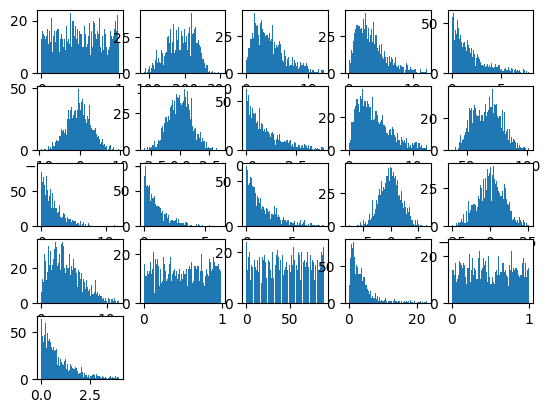

In [10]:
from matplotlib import pyplot as plt
plt.figure()
for i in range(X_data.shape[1] - 1):
    plt.subplot(5,5,i+1)
    plt.hist(X_data[:, i], bins = 100)
plt.show()

## Select Feature

2041


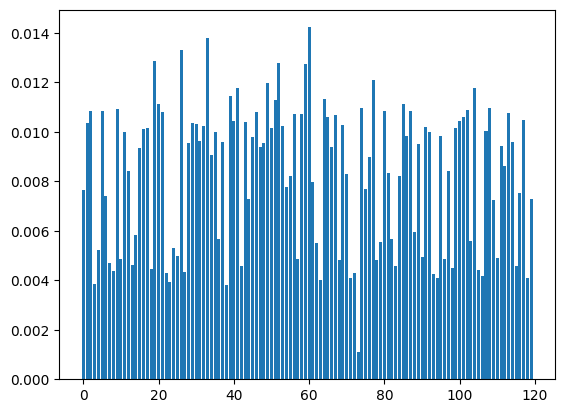

In [14]:
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot as plt

result = np.zeros((120, ))
j = 0
for i in range (1, 10000):
    X_train, y_train, X_test, y_test = spilit_data()
    model = DecisionTreeClassifier(max_features='log2', max_depth= 10)
    model.fit(X_train, y_train.flatten())
    if model.score(X_test, y_test) >= 0.27:
        j += 1
        result += np.array(model.feature_importances_)
print(j)

plt.bar(range(0, 120), result / j)
plt.show()

In [ ]:
for i in range(120):
    if result[i] / j > 0.011:
        print(i)

## Train

### 线性回归模型

In [21]:
from model import *

X_train, y_train, X_test, y_test = spilit_data()
y_train1 = np.frompyfunc(lambda x: 1 if x == 0 else 0, 1, 1)(y_train)
y_train1 = np.array(y_train1, dtype=np.float64)
y_train2 = np.frompyfunc(lambda x: 1 if x == 1 else 0, 1, 1)(y_train)
y_train2 = np.array(y_train2, dtype=np.float64)
y_train3 = np.frompyfunc(lambda x: 1 if x == 2 else 0, 1, 1)(y_train)
y_train3 = np.array(y_train3, dtype=np.float64)
y_train4 = np.frompyfunc(lambda x: 1 if x == 3 else 0, 1, 1)(y_train)
y_train4 = np.array(y_train4, dtype=np.float64)
model1 = LogisticRegression(gamma=0, plot=False)
model1.fit(X_train, y_train1,pattern='newton')
model2 = LogisticRegression(gamma=0, plot=False)
model2.fit(X_train, y_train2,pattern='newton')
model3 = LogisticRegression(gamma=0, plot=False)
model3.fit(X_train, y_train3,pattern='newton')
model4 = LogisticRegression(gamma=0, plot=False)
model4.fit(X_train, y_train4,pattern='newton')

result = predictOvR(X_train, model1, model2, model3, model4)
delta = result - y_train
num = 0
for i in range(delta.shape[0]):
    if delta[i] != 0:
        num += 1
print('train accuracy:{}'.format(1-num/delta.shape[0]))

result = predictOvR(X_test, model1, model2, model3, model4)
delta = result - y_test
num = 0
for i in range(delta.shape[0]):
    if delta[i] != 0:
        num += 1
print('test accuracy:{}'.format(1-num/delta.shape[0]))

train accuracy:0.3285024154589372
test accuracy:0.2682215743440233


In [53]:
from sklearn.linear_model import LogisticRegression

X_train, y_train, X_test, y_test = spilit_data()
model = LogisticRegression()
model.fit(X_train, y_train.flatten())
print('train accuracy:{}'.format(model.score(X_train, y_train)))
print('test accuracy:{}'.format(model.score(X_test, y_test)))

train accuracy:0.32560386473429953
test accuracy:0.2653061224489796


c:\ProgramData\Anaconda3\envs\ml\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 决策树模型

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# 使用网格搜索进行调参
clf = DecisionTreeClassifier(random_state=0)
params = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': range(1, 30, 1),
    'max_features' : ['auto', 'sqrt', 'log2', None]
}
gs = GridSearchCV(clf, params, cv=4, scoring='accuracy', n_jobs=-1)
gs.fit(X_data[:, :-1], X_data[:, -1])

print(gs.best_params_)
print(gs.best_score_)

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
score = 0
for j in range (10):
    model = DecisionTreeClassifier(max_depth= 10)
    scores = cross_val_score(model, X_data[:, :-1], X_data[:, -1].flatten(), cv=4, scoring='accuracy', n_jobs=-1)
    score += scores.mean()
print(score / 10)

0.266519421975059


### 神经网络模型

In [43]:
from sklearn.neural_network import MLPClassifier

X_train, y_train, X_test, y_test = spilit_data()
model = MLPClassifier()
model.fit(X_train, y_train.flatten())
print('train accuracy:{}'.format(model.score(X_train, y_train)))
print('test accuracy:{}'.format(model.score(X_test, y_test)))

train accuracy:0.34106280193236715
test accuracy:0.26822157434402333


### 支持向量机

In [45]:
from model import *

X_train, y_train, X_test, y_test = spilit_data()
y_train1 = np.frompyfunc(lambda x: 1 if x == 0 else -1, 1, 1)(y_train)
y_train1 = np.array(y_train1, dtype=np.float64)
y_train2 = np.frompyfunc(lambda x: 1 if x == 1 else -1, 1, 1)(y_train)
y_train2 = np.array(y_train2, dtype=np.float64)
y_train3 = np.frompyfunc(lambda x: 1 if x == 2 else -1, 1, 1)(y_train)
y_train3 = np.array(y_train3, dtype=np.float64)
y_train4 = np.frompyfunc(lambda x: 1 if x == 3 else -1, 1, 1)(y_train)
y_train4 = np.array(y_train4, dtype=np.float64)

model1 = SVM(X_train.shape[1], plot = False)
model1.fit(X_train, y_train1)
model2 = SVM(X_train.shape[1], plot = False)
model2.fit(X_train, y_train2)
model3 = SVM(X_train.shape[1], plot = False)
model3.fit(X_train, y_train3)
model4 = SVM(X_train.shape[1], plot = False)
model4.fit(X_train, y_train4)

result = predictOvR(X_train, model1, model2, model3, model4)
delta = result - y_train
num = 0
for i in range(delta.shape[0]):
    if delta[i] != 0:
        num += 1
print('train accuracy:{}'.format(1-num/delta.shape[0]))

result = predictOvR(X_test, model1, model2, model3, model4)
delta = result - y_test
num = 0
for i in range(delta.shape[0]):
    if delta[i] != 0:
        num += 1
print('test accuracy:{}'.format(1-num/delta.shape[0]))

train accuracy:0.263768115942029
test accuracy:0.26530612244897955


In [49]:
from sklearn import svm

X_train, y_train, X_test, y_test = spilit_data()
model = svm.SVC()
model.fit(X_train, y_train.flatten())
print('train accuracy:{}'.format(model.score(X_train, y_train)))
print('test accuracy:{}'.format(model.score(X_test, y_test)))

train accuracy:0.263768115942029
test accuracy:0.2653061224489796


### XGBoost

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb

# 使用随机搜索进行调参
clf = xgb.XGBClassifier(random_state=0)
param_dist = {
    'n_estimators': range(1, 50, 1),
    'max_depth': range(2, 15, 1),
    'learning_rate': np.linspace(0.01, 0.1, 10),
}
rs = RandomizedSearchCV(clf, param_dist, cv=4, scoring='accuracy', n_iter=500, n_jobs=-1)
rs.fit(X_data[:, :-1], X_data[:, -1])

print(rs.best_params_)
print(rs.best_score_)

In [5]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
score = 0
for j in range (10):
    model = XGBClassifier(max_depth=4,learning_rate =0.02, n_estimators = 21)
    scores = cross_val_score(model, X_data[:, :-1], X_data[:, -1].flatten(), cv=4, scoring='accuracy', n_jobs=-1)
    score += scores.mean()
print(score / 10)

0.25919999999999993


## Test

In [6]:
dfx = pd.read_csv('test_feature.csv')

dfx = pd.DataFrame(dfx, columns=['feature_2','feature_5','feature_19','feature_26','feature_33',
'feature_39','feature_41','feature_46','feature_49','feature_50','feature_51','feature_52',
'feature_58','feature_59','feature_60','feature_65','feature_85','feature_87','feature_99',
'feature_102','feature_104'])

for i in range(dfx.shape[1]):
    empty = dfx.iloc[:, i].isnull()
    dfx.iloc[empty.values, i] = np.random.choice(
        dfx.iloc[~empty.values, i].values, len(dfx.iloc[empty.values, i]))


for i in range(dfx.shape[1]):
    mean = mean_array[i]
    std = std_array[i]
    # 在均值三个标准差外为异常值
    dfx.iloc[:, i] = dfx.iloc[:, i].apply(
        lambda x: None if x < mean - 3 * std or x > mean + 3 * std else x)
    empty = dfx.iloc[:, i].isnull()
    dfx.iloc[empty.values, i] = np.random.choice(
        dfx.iloc[~empty.values, i].values, len(dfx.iloc[empty.values, i]))

dfx.head()

,feature_2,feature_5,feature_19,feature_26,feature_33,feature_39,feature_41,feature_46,feature_49,feature_50,...,feature_52,feature_58,feature_59,feature_60,feature_65,feature_85,feature_87,feature_99,feature_102,feature_104
0,0.660595,238.0,1.549542,1.974966,2.725347,-3.242426,0.879775,0.057391,3.258834,69.0,...,0.627834,2.046302,-0.220132,2.931780,11.676730,0.298230,78.0,1.793618,0.002772,0.069726
1,0.161648,265.0,2.529570,7.471475,2.998298,4.072643,-0.962541,0.591648,0.759475,62.7,...,1.249850,0.503869,-0.312291,-7.435891,7.877762,0.359995,37.0,17.645746,0.210309,1.814124
2,0.476025,147.0,2.106264,3.849340,0.183088,-3.153270,0.305942,0.025217,4.775132,54.0,...,0.457969,1.041078,0.686087,5.310794,2.175832,0.512062,46.0,1.976593,0.826825,1.052510
3,0.443195,228.0,8.466440,3.716741,0.072297,6.427429,-1.032114,0.230440,3.279455,62.4,...,1.323022,0.145735,-0.308775,-4.180913,5.588029,0.634822,72.0,1.531472,0.268398,0.660510
4,0.639575,258.0,1.224897,4.806361,5.768644,-0.832094,0.161814,0.341341,2.994873,86.4,...,0.153069,0.427243,-0.541246,-2.053207,1.417476,0.028698,67.0,7.040435,0.364604,0.785395


In [7]:
from xgboost import XGBClassifier

model = XGBClassifier(max_depth=4,learning_rate =0.02, n_estimators = 21)
model.fit(X_data[:, :-1], X_data[:, -1].flatten())
result = model.predict(np.array(dfx))
df = pd.DataFrame(result, columns=['label'])
df.to_csv('test_label.csv', index=False)